In [29]:
from SQLite_handler import *
import rapidjson as json
from tqdm import tqdm
from pathlib import Path
import os
sns.set(style="darkgrid", font_scale=1.5)
# plt.style.use('fivethirtyeight')

# 0 > JB; 1 > DT
US_states = ['NY', 'DC', 'IN', 'AR', 'WY', 'ME', 'TX', 'NH', 'CO', 'CA', 'IL',
             'WA', 'VA', 'FL', 'MA', 'OR', 'AZ', 'MT', 'MN', 'NE', 'TN', 'OH',
             'NJ', 'NV', 'KY', 'UT', 'NC', 'SC', 'PA', 'NM', 'KS', 'GA', 'MI',
             'WI', 'AK', 'MS', 'MD', 'LA', 'HI', 'MO', 'AL', 'CT', 'OK', 'IA',
             'WV', 'RI', 'SD', 'VT', 'ND', 'ID', 'DE']

In [9]:
user_info = {}
for line in tqdm(open("D:/US2020/user-state.txt", encoding='utf8')):
    w = line.strip().split("\t")
    user_info[w[0]] = w[-1] # 州结果

6739702it [00:10, 634150.41it/s]


In [10]:
def calc_state_result(json_file_name):
    """读入用户意见文件，得到最终每个州的结果

    Args:
        json_file_name ([type]): [description]
    """
    print("calc_state_result()", json_file_name)
    user_result = json.load(open(json_file_name, encoding='utf8'))
    u_table = []

    for u, v in user_result.items():
        if u not in user_info:
            continue
        u_state = user_info[u]
        if v[0] > v[1]:
            opinion = "B"
        elif v[0] < v[1]:
            opinion = "T"
        elif v[0] == v[1]:
            opinion = "U"

        u_table.append({
            "uid": u,
            "state": u_state,
            "opinion": opinion
        })

    u_df = pd.DataFrame(u_table).set_index('uid')
    u_result = u_df.groupby("state")["opinion"].value_counts()

    names = json_file_name.split("/")
    # u_result.to_csv(f"data/states_result/{names[-2]}-{names[-1][:-5]}.csv")

    u_state_result = {}

    for k, row in u_result.iteritems():
        if k[0] not in u_state_result:
            u_state_result[k[0]] = {"T": 0, "B": 0, "U": 0}
        u_state_result[k[0]][k[1]] = row

    df_state_result = pd.DataFrame(u_state_result).T

    df_state_result["Trump (%)"] =  df_state_result["T"] / (df_state_result["T"] + df_state_result["B"] + df_state_result["U"])
    df_state_result["Biden (%)"] =  df_state_result["B"] / (df_state_result["T"] + df_state_result["B"] + df_state_result["U"])
    df_state_result["Undecided (%)"] =  df_state_result["U"] / (df_state_result["T"] + df_state_result["B"] + df_state_result["U"])
    df_state_result.sort_values("Trump (%)", ascending=False)

    df_state_result.to_csv(f"data/states_result/final_{names[-2]}-{names[-1][:-5]}.csv", float_format='%.4f')



In [12]:
calc_state_result("data/users-cumFrom01-v1-0.5/2020-10-31.json")
calc_state_result("data/users-cumFrom01-v1-0.66/2020-10-31.json")
calc_state_result("data/users-cumFrom01-v2-0.5/2020-10-31.json")
calc_state_result("data/users-cumFrom01-v2-0.66/2020-10-31.json")

calc_state_result() data/users-cumFrom01-v2-0.66/2020-10-31.json


In [3]:
# 获取最终州结果

df = pd.read_csv('data/1976-2020-president.csv')
df = df[(df.year==2020) & (df.party_detailed.isin(["DEMOCRAT", "REPUBLICAN"]))]

In [23]:
df

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
3740,2020,ALABAMA,AL,1,63,41,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,849624,2323282,20210113,NaN,DEMOCRAT
3741,2020,ALABAMA,AL,1,63,41,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,1441170,2323282,20210113,NaN,REPUBLICAN
3744,2020,ALASKA,AK,2,94,81,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,153778,359530,20210113,NaN,DEMOCRAT
3745,2020,ALASKA,AK,2,94,81,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,189951,359530,20210113,NaN,REPUBLICAN
3752,2020,ARIZONA,AZ,4,86,61,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,1672143,3387326,20210113,NaN,DEMOCRAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,2020,WEST VIRGINIA,WV,54,55,56,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,545382,794652,20210113,NaN,REPUBLICAN
4267,2020,WISCONSIN,WI,55,35,25,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,1630866,3298041,20210113,NaN,DEMOCRAT
4268,2020,WISCONSIN,WI,55,35,25,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,1610184,3298041,20210113,NaN,REPUBLICAN
4280,2020,WYOMING,WY,56,83,68,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,73491,278503,20210113,NaN,DEMOCRAT


In [26]:
df["%"] = df.candidatevotes / df.totalvotes

In [42]:
votes = []

for state in df.state_po.unique():
    df_state = df[df.state_po == state]
    # print(df_state)
    dem = float(df_state[df_state.party_detailed=='DEMOCRAT']['candidatevotes'] / df_state.candidatevotes.sum())
    rep = float(df_state[df_state.party_detailed=='REPUBLICAN']['candidatevotes'] / df_state.candidatevotes.sum())
    print(state, dem, rep)
    d = {
        "state": state,
        "Biden": dem,
        "Trump": rep,
    }
    votes.append(d)

votes = pd.DataFrame(votes).set_index("state")

AL 0.3708862516664528 0.6291137483335473
AK 0.4473815127615069 0.5526184872384932
AZ 0.5015683167912931 0.49843168320870684
AR 0.3578756672201685 0.6421243327798315
CA 0.6490891136066756 0.3509108863933243
CO 0.5693831949230015 0.43061680507699845
CT 0.6019504908807785 0.39804950911922155
DE 0.5962674416498447 0.40373255835015526
DC 0.9446695384761944 0.05533046152380555
FL 0.48305245337858443 0.5169475466214156
GA 0.5011932966290864 0.49880670337091354
HI 0.6503266464651488 0.3496733535348512
ID 0.3412285707492213 0.6587714292507787
IL 0.5865904373280693 0.4134095626719308
IN 0.4180495199255704 0.5819504800744296
IA 0.4581673691536295 0.5418326308463706
KS 0.4250657174436865 0.5749342825563135
KY 0.36799897099737033 0.6320010290026297
LA 0.4053555954370895 0.5946444045629105
ME 0.5467040458200397 0.45329595417996027
MD 0.6702904704709234 0.3297095295290766
MA 0.6711554954014815 0.3288445045985185
MI 0.5141355934440947 0.4858644065559054
MN 0.5363951364856667 0.46360486351433333
MS 0.4

In [47]:
votes.sort_values('Trump').to_csv("data/2020-votes.csv", float_format="%.4f")

csv file: data/states_result/final_users-cumFrom01-v1-0.5-2020-10-31.csv
Wrong States: Index(['HI', 'NM', 'NV', 'AZ', 'GA', 'IA'], dtype='object', name='state')
Average error (%): 8.413333333333332
Average error for wrong states 6.561960784313725
0.7328597283557049
(51, 1)
0.5370833814455979


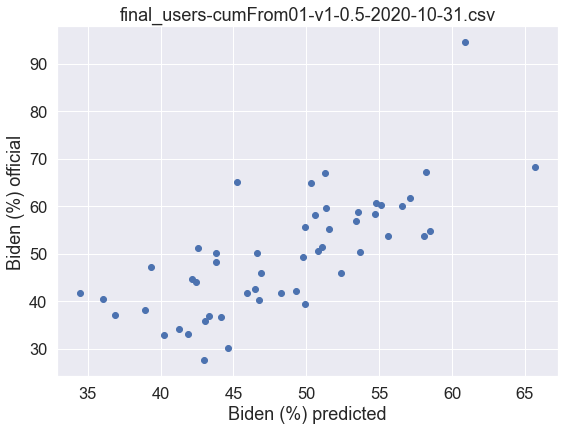

csv file: data/states_result/final_users-cumFrom01-v1-0.66-2020-10-31.csv
Wrong States: Index(['HI', 'NV', 'AZ', 'GA', 'NC', 'IA', 'MO', 'UT'], dtype='object', name='state')
Average error (%): 8.0275
Average error for wrong states 6.240980392156864
0.7446012439300032
(51, 1)
0.5544310124621081


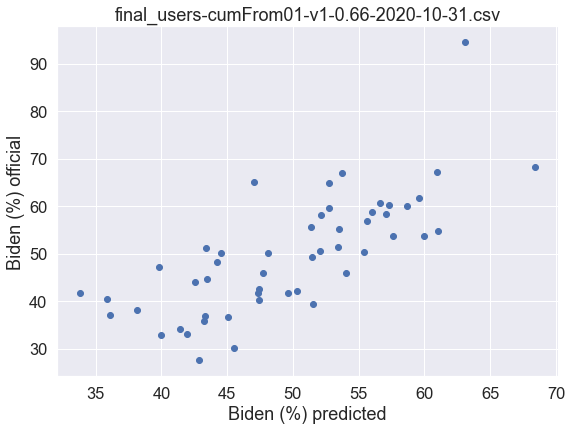

csv file: data/states_result/final_users-cumFrom01-v2-0.5-2020-10-31.csv
Wrong States: Index(['NC', 'FL', 'OH', 'IA', 'AK', 'KS', 'MO', 'IN', 'MT', 'NE', 'UT', 'KY',
       'SD', 'AR', 'OK', 'WV'],
      dtype='object', name='state')
Average error (%): 13.634375
Average error for wrong states 8.915490196078432
0.7744042775615174
(51, 1)
0.5997019851055758


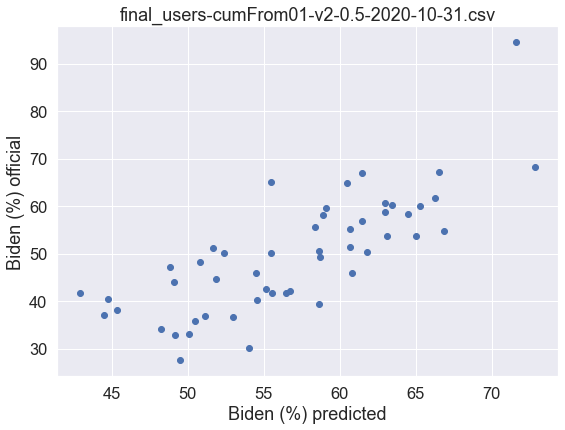

csv file: data/states_result/final_users-cumFrom01-v2-0.66-2020-10-31.csv
Wrong States: Index(['NC', 'FL', 'OH', 'IA', 'AK', 'KS', 'MO', 'IN', 'MT', 'NE', 'UT', 'KY',
       'SD', 'AR', 'OK', 'WV'],
      dtype='object', name='state')
Average error (%): 14.663125
Average error for wrong states 9.84686274509804
0.7816356211514889
(51, 1)
0.6109542442528737


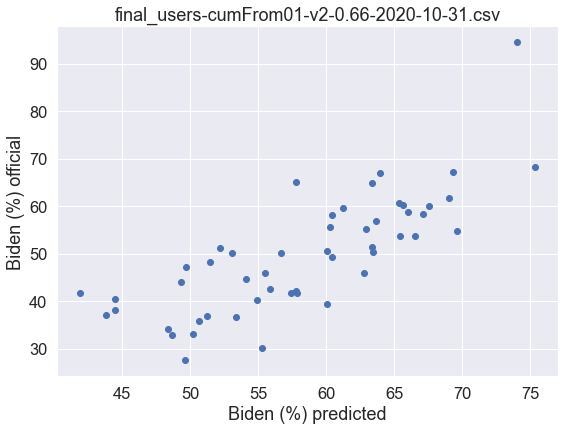

In [34]:
official_votes = pd.read_csv('data/2020-votes.csv').set_index("state")
official_votes = official_votes.rename(columns={"Biden": "Biden (%) official", "Trump": "Trump (%) official"})
# display(official_votes)

# import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score


US_states = ['NY', 'DC', 'IN', 'AR', 'WY', 'ME', 'TX', 'NH', 'CO', 'CA', 'IL',
             'WA', 'VA', 'FL', 'MA', 'OR', 'AZ', 'MT', 'MN', 'NE', 'TN', 'OH',
             'NJ', 'NV', 'KY', 'UT', 'NC', 'SC', 'PA', 'NM', 'KS', 'GA', 'MI',
             'WI', 'AK', 'MS', 'MD', 'LA', 'HI', 'MO', 'AL', 'CT', 'OK', 'IA',
             'WV', 'RI', 'SD', 'VT', 'ND', 'ID', 'DE', 'None']

def calc_error(csv_file_name):
    print("csv file:", csv_file_name)
    data_states = pd.read_csv(csv_file_name)
    # display(data_states)
    data_states = data_states.rename(columns={"Unnamed: 0": "state"})
    data_states = data_states.set_index("state")
    
    # 二分类
    data_states['Biden (%) predicted'] = data_states['Biden (%)'] / (1 - data_states['Undecided (%)'])
    data_states['Trump (%) predicted'] = data_states['Trump (%)'] / (1 - data_states['Undecided (%)'])

    data_states = data_states.join(official_votes)
    # display(data_states)

    data_states = data_states[['Biden (%) predicted', 'Trump (%) predicted', 'Biden (%) official', 'Trump (%) official']]
    data_states = data_states * 100
    data_states = data_states.round(2)
    data_states = data_states.sort_values("Trump (%) official")

    
    data_states = data_states.drop("None")

    # 是否准确
    # data_states['support Biden predicted'] = data_states['Biden (%) predicted'].apply(lambda x: True if x > 50 else False)
    # data_states['support Biden official'] = data_states['Biden (%) official'].apply(lambda x: True if x > 50 else False)
    data_states['support Biden predicted'] = data_states['Biden (%) predicted'] > 50 
    data_states['support Biden official'] = data_states['Biden (%) official'] > 50
    # display(data_states)
    data_states['correct'] = (((data_states['Biden (%) predicted'] > 50) & (data_states['Biden (%) official'] > 50)) | ((data_states['Trump (%) predicted'] > 50) & (data_states['Trump (%) official'] > 50)))

    # 误差
    data_states['error'] = (data_states['Biden (%) predicted'] - data_states['Biden (%) official']).abs()
    # display(data_states)

    print("Wrong States:", data_states[data_states.correct == False].index)
    print("Average error (%):", data_states[data_states.correct == False].error.mean())
    print("Average error for wrong states", data_states.error.mean())

    # 相关性
    print(data_states['Biden (%) predicted'].corr(data_states['Biden (%) official']))

    # 回归系数
    # result = sm.ols(formula="Biden (%) predicted ~ Biden (%) official", data=data_states).fit()
    # print(result.param)
    linreg = LinearRegression()
    X = np.array(data_states['Biden (%) predicted']).reshape(-1, 1)
    print(X.shape)
    linreg.fit(X, data_states['Biden (%) official'])
    print(r2_score(data_states['Biden (%) official'], linreg.predict(X)))

    csv_path = Path(csv_file_name)

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(data_states['Biden (%) predicted'], data_states['Biden (%) official'])
    plt.xlabel("Biden (%) predicted")
    plt.ylabel("Biden (%) official")
    plt.title(csv_path.name)
    plt.show()
    plt.savefig(str(csv_path.parent) + '/' + csv_path.name + '.png')
    plt.close()
    # print("- " * 50)

    csv_path = Path(csv_file_name)
    data_states.to_csv(str(csv_path.parent) + '/included_err_' + csv_path.name, float_format="%.2f")

calc_error("data/states_result/final_users-cumFrom01-v1-0.5-2020-10-31.csv")
calc_error("data/states_result/final_users-cumFrom01-v1-0.66-2020-10-31.csv")
calc_error("data/states_result/final_users-cumFrom01-v2-0.5-2020-10-31.csv")
calc_error("data/states_result/final_users-cumFrom01-v2-0.66-2020-10-31.csv")

In [20]:
# 每个州所占的票数

import pandas as pd

off_d = pd.read_excel('data/states_result/official_us_results.xlsx').set_index('STATE')
off_d = off_d.fillna(0)
off_d = off_d.head(51)
off_d

,ELECTORAL VOTES,Biden,Trump
STATE,,,
AL,9,0.0,9.0
AK,3,0.0,3.0
AZ,11,11.0,0.0
AR,6,0.0,6.0
CA,55,55.0,0.0
CO,9,9.0,0.0
CT,7,7.0,0.0
DE,3,3.0,0.0
DC,3,3.0,0.0


In [16]:
official_votes = pd.read_csv('data/2020-votes.csv').set_index("state")
official_votes = official_votes.rename(columns={"Biden": "Biden (%) official", "Trump": "Trump (%) official"})
# display(official_votes)

# import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score


US_states = ['NY', 'DC', 'IN', 'AR', 'WY', 'ME', 'TX', 'NH', 'CO', 'CA', 'IL',
             'WA', 'VA', 'FL', 'MA', 'OR', 'AZ', 'MT', 'MN', 'NE', 'TN', 'OH',
             'NJ', 'NV', 'KY', 'UT', 'NC', 'SC', 'PA', 'NM', 'KS', 'GA', 'MI',
             'WI', 'AK', 'MS', 'MD', 'LA', 'HI', 'MO', 'AL', 'CT', 'OK', 'IA',
             'WV', 'RI', 'SD', 'VT', 'ND', 'ID', 'DE', 'None']

def calc_ELECTORAL_VOTES(csv_file_name):
    print("csv file:", csv_file_name)
    data_states = pd.read_csv(csv_file_name)
    # display(data_states)
    data_states = data_states.rename(columns={"Unnamed: 0": "state"})
    data_states = data_states.set_index("state")
    
    # 二分类
    data_states['Biden (%) predicted'] = data_states['Biden (%)'] / (1 - data_states['Undecided (%)'])
    data_states['Trump (%) predicted'] = data_states['Trump (%)'] / (1 - data_states['Undecided (%)'])

    data_states = data_states.join(official_votes)
    # display(data_states)

    data_states = data_states[['Biden (%) predicted', 'Trump (%) predicted', 'Biden (%) official', 'Trump (%) official']]
    data_states = data_states * 100
    data_states = data_states.round(2)
    data_states = data_states.sort_values("Trump (%) official")

    
    data_states = data_states.drop("None")

    # 是否准确
    # data_states['support Biden predicted'] = data_states['Biden (%) predicted'].apply(lambda x: True if x > 50 else False)
    # data_states['support Biden official'] = data_states['Biden (%) official'].apply(lambda x: True if x > 50 else False)
    data_states['support Biden predicted'] = data_states['Biden (%) predicted'] > 50 
    data_states['support Biden official'] = data_states['Biden (%) official'] > 50
    # display(data_states)

    biden_votes = 0
    trump_votes = 0
    for state, vote in zip(off_d['ELECTORAL VOTES'].index, off_d['ELECTORAL VOTES']):
        # print(state, vote)
        if data_states[data_states.index==state]['support Biden predicted'].bool():
            biden_votes += vote
        else:
            trump_votes += vote
    print(biden_votes, trump_votes)
    

calc_ELECTORAL_VOTES("data/states_result/final_users-cumFrom01-v1-0.5-2020-10-31.csv")
calc_ELECTORAL_VOTES("data/states_result/final_users-cumFrom01-v1-0.66-2020-10-31.csv")
calc_ELECTORAL_VOTES("data/states_result/final_users-cumFrom01-v2-0.5-2020-10-31.csv")
calc_ELECTORAL_VOTES("data/states_result/final_users-cumFrom01-v2-0.66-2020-10-31.csv")

csv file: data/states_result/final_users-cumFrom01-v1-0.5-2020-10-31.csv
270 268
csv file: data/states_result/final_users-cumFrom01-v1-0.66-2020-10-31.csv
306 232
csv file: data/states_result/final_users-cumFrom01-v2-0.5-2020-10-31.csv
447 91
csv file: data/states_result/final_users-cumFrom01-v2-0.66-2020-10-31.csv
447 91
